In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Compress

**Modifying or Coverting bits structure of data to comsume less space**
Common technique removes and replaces repetitive data elements and symbols to reduce data size

In [109]:
#change this on your side

noisyData = pd.read_csv('C:/Users/snghi/Documents/NUST/Semester 4/Data Analytics/Homework/Data Cleaning/noisydata.csv', usecols=[0,6,7])

In [110]:
noisyData

,Year,19L/R,19L/R Percent of Departures
0,2005,4,2%
1,2005,0,0%
2,2005,0,0%
3,2005,0,0%
4,2005,0,0%
...,...,...,...
126,2015,0,0%
127,2015,0,0%
128,2015,0,0%
129,2015,0,0%


In [144]:
noisyData.to_pickle("noisydata.pkl")

In [145]:
unpicked = pd.read_pickle("noisydata.pkl")
unpicked

,Year,19L/R,19L/R Percent of Departures
0,2005,4,2%
1,2005,0,0%
2,2005,0,0%
3,2005,0,0%
4,2005,0,0%
...,...,...,...
126,2015,0,0%
127,2015,0,0%
128,2015,0,0%
129,2015,0,0%


# Smoothing

In [111]:
noisyDataString = noisyData.astype("string")
print(noisyDataString.dtypes)

Year                           string
19L/R                          string
19L/R Percent of Departures    string
dtype: object


In [112]:
noisyDataString["19L/R Percent of Departures"]=noisyDataString["19L/R Percent of Departures"].str.replace("%","")

noisyDataString

,Year,19L/R,19L/R Percent of Departures
0,2005,4,2
1,2005,0,0
2,2005,0,0
3,2005,0,0
4,2005,0,0
...,...,...,...
126,2015,0,0
127,2015,0,0
128,2015,0,0
129,2015,0,0


In [113]:
noisyDataInt = noisyDataString.astype("int")
print(noisyDataInt.dtypes)

Year                           int32
19L/R                          int32
19L/R Percent of Departures    int32
dtype: object


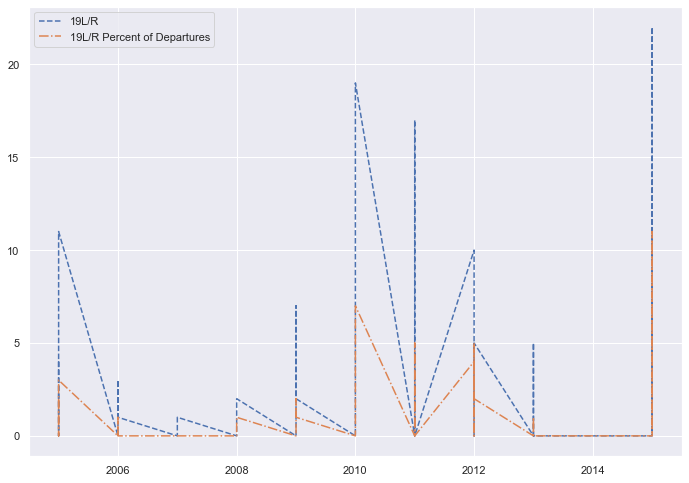

In [115]:
plt.plot(noisyDataInt["Year"], noisyDataInt["19L/R"], label = "19L/R", linestyle = "--")
plt.plot(noisyDataInt["Year"], noisyDataInt["19L/R Percent of Departures"], label = "19L/R Percent of Departures", linestyle = "-.")
plt.legend()
plt.show()

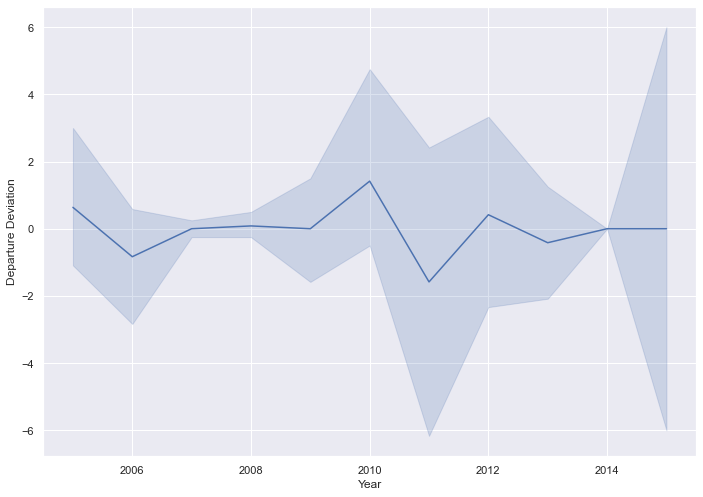

In [142]:
noisyDataInt["Departure Deviation"] = noisyData["19L/R"].diff()

sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x = "Year",
    y = "Departure Deviation",
    data = noisyDataInt
)
plt.show()

In [138]:
noisyDataInt['Moving Average'] = noisyDataInt['Departure Deviation'].rolling(7).sum()
noisyDataInt

,Year,19L/R,19L/R Percent of Departures,Moving Average,Departure Deviation
0,2005,4,2,NaN,NaN
1,2005,0,0,NaN,-4.0
2,2005,0,0,NaN,0.0
3,2005,0,0,NaN,0.0
4,2005,0,0,NaN,0.0
...,...,...,...,...,...
126,2015,0,0,0.0,0.0
127,2015,0,0,0.0,0.0
128,2015,0,0,-22.0,0.0
129,2015,0,0,0.0,0.0


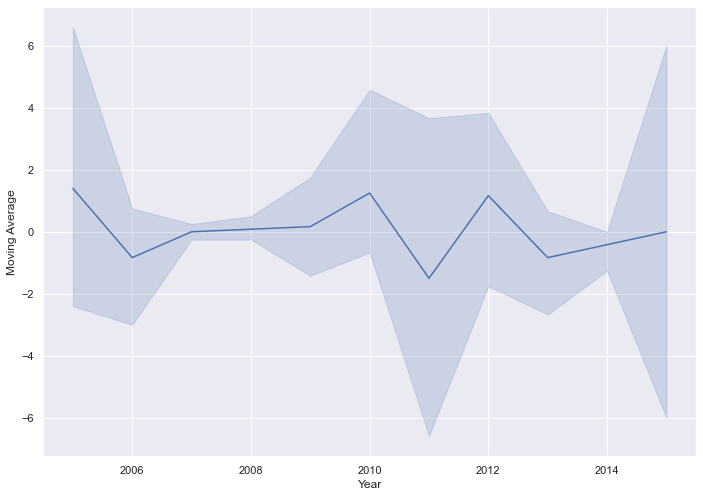

In [139]:
noisyDataInt.dropna()
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x = "Year",
    y = "Moving Average",
    data = noisyDataInt
)
plt.show()